#Step 1: Importing all the necessary libraries

In [ ]:
## All the basic ones we need are copy pasted here (we may not use it all! and import some later depending on the data!)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import math

from sklearn.preprocessing import LabelEncoder,normalize,MinMaxScaler,StandardScaler
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,accuracy_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import pickle


#Step 2 : Read the dataset and perform Feature Engineering via EDA

In [ ]:
## Reading data using pandas library
train = pd.read_csv('/content/drive/MyDrive/ML for Physics Applications/Content/Beginner Program/Notebooks/Week 9/Higgs Boston/Datasets/training.csv')
test = pd.read_csv('/content/drive/MyDrive/ML for Physics Applications/Content/Beginner Program/Notebooks/Week 9/Higgs Boston/Datasets/test.csv')

## Printing the shape of training and testing dataset
print("Train - ", train.shape,"\nTest - ", test.shape)

Train -  (250000, 33) 
Test -  (550000, 31)


In [ ]:
display( train.head(), test.head())

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [ ]:
display(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

None

None

About Train and Test Dataset

> Train Dataset contains 33 columns includes Label(Target Feature)

> Test Dataset contains 31 Columns doesnot include "Label" and "Weight" which present in Train Dataset.

> To Balance Both dataset , it is mndatory to remove "weight" from Train Dataset

> Both Dataset looks normal, no missing values and except "Label", all columns are numeric in nature.

In [ ]:
train = train.drop(['Weight'], axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

Some key points about the train dataset


> it can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables

> We check how many of these missing values are present in each of the feature columns

> We remove all these columns completely for all models.


In [ ]:
def value_counts(train):
    unique_count = pd.DataFrame(columns=["Feature name", "No. of Unique values", "% of missing values"])
    total_count = len(train.index)
    thresh = 70
    
    nan_cols, drop_cols= [] , []
    for line, feature in enumerate(train.columns):
        s = f"{feature}"

        count = len(train[feature].unique())
        vals = train[feature].value_counts()
        missing = 0
        if -999.0 in vals:
            missing = round(vals[-999.0]/ total_count*100, 2)
            nan_cols.append(feature)
            s+= " *"
            if missing > thresh:
                drop_cols.append(feature)
                s += " #"
                
        unique_count.loc[line]= [s, count, missing]
    return unique_count, nan_cols, drop_cols

display(value_counts(train)[0])

,Feature name,No. of Unique values,% of missing values
0,EventId,250000,0
1,DER_mass_MMC *,108338,15.25
2,DER_mass_transverse_met_lep,101637,0
3,DER_mass_vis,100558,0
4,DER_pt_h,115563,0
5,DER_deltaeta_jet_jet * #,7087,70.98
6,DER_mass_jet_jet * #,68366,70.98
7,DER_prodeta_jet_jet * #,16593,70.98
8,DER_deltar_tau_lep,4692,0
9,DER_pt_tot,59042,0


In [ ]:
drop_columns = ['DER_mass_MMC',
                'DER_deltaeta_jet_jet',
                'DER_mass_jet_jet',
                'DER_prodeta_jet_jet',
                'DER_lep_eta_centrality',
                'PRI_jet_leading_pt',
                'PRI_jet_leading_eta',
                'PRI_jet_leading_phi',
                'PRI_jet_subleading_pt',
                'PRI_jet_subleading_eta',
                'PRI_jet_subleading_phi']

In [ ]:
train = train.drop(drop_columns, axis=1) 

In [ ]:
test = test.drop(drop_columns, axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltar_tau_lep           250000 non-null  float64
 5   DER_pt_tot                   250000 non-null  float64
 6   DER_sum_pt                   250000 non-null  float64
 7   DER_pt_ratio_lep_tau         250000 non-null  float64
 8   DER_met_phi_centrality       250000 non-null  float64
 9   PRI_tau_pt                   250000 non-null  float64
 10  PRI_tau_eta                  250000 non-null  float64
 11  PRI_tau_phi                  250000 non-null  float64
 12  PRI_lep_pt                   250000 non-null  float64
 13 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      550000 non-null  int64  
 1   DER_mass_transverse_met_lep  550000 non-null  float64
 2   DER_mass_vis                 550000 non-null  float64
 3   DER_pt_h                     550000 non-null  float64
 4   DER_deltar_tau_lep           550000 non-null  float64
 5   DER_pt_tot                   550000 non-null  float64
 6   DER_sum_pt                   550000 non-null  float64
 7   DER_pt_ratio_lep_tau         550000 non-null  float64
 8   DER_met_phi_centrality       550000 non-null  float64
 9   PRI_tau_pt                   550000 non-null  float64
 10  PRI_tau_eta                  550000 non-null  float64
 11  PRI_tau_phi                  550000 non-null  float64
 12  PRI_lep_pt                   550000 non-null  float64
 13 

Drop Features using Correlation_HeatMap

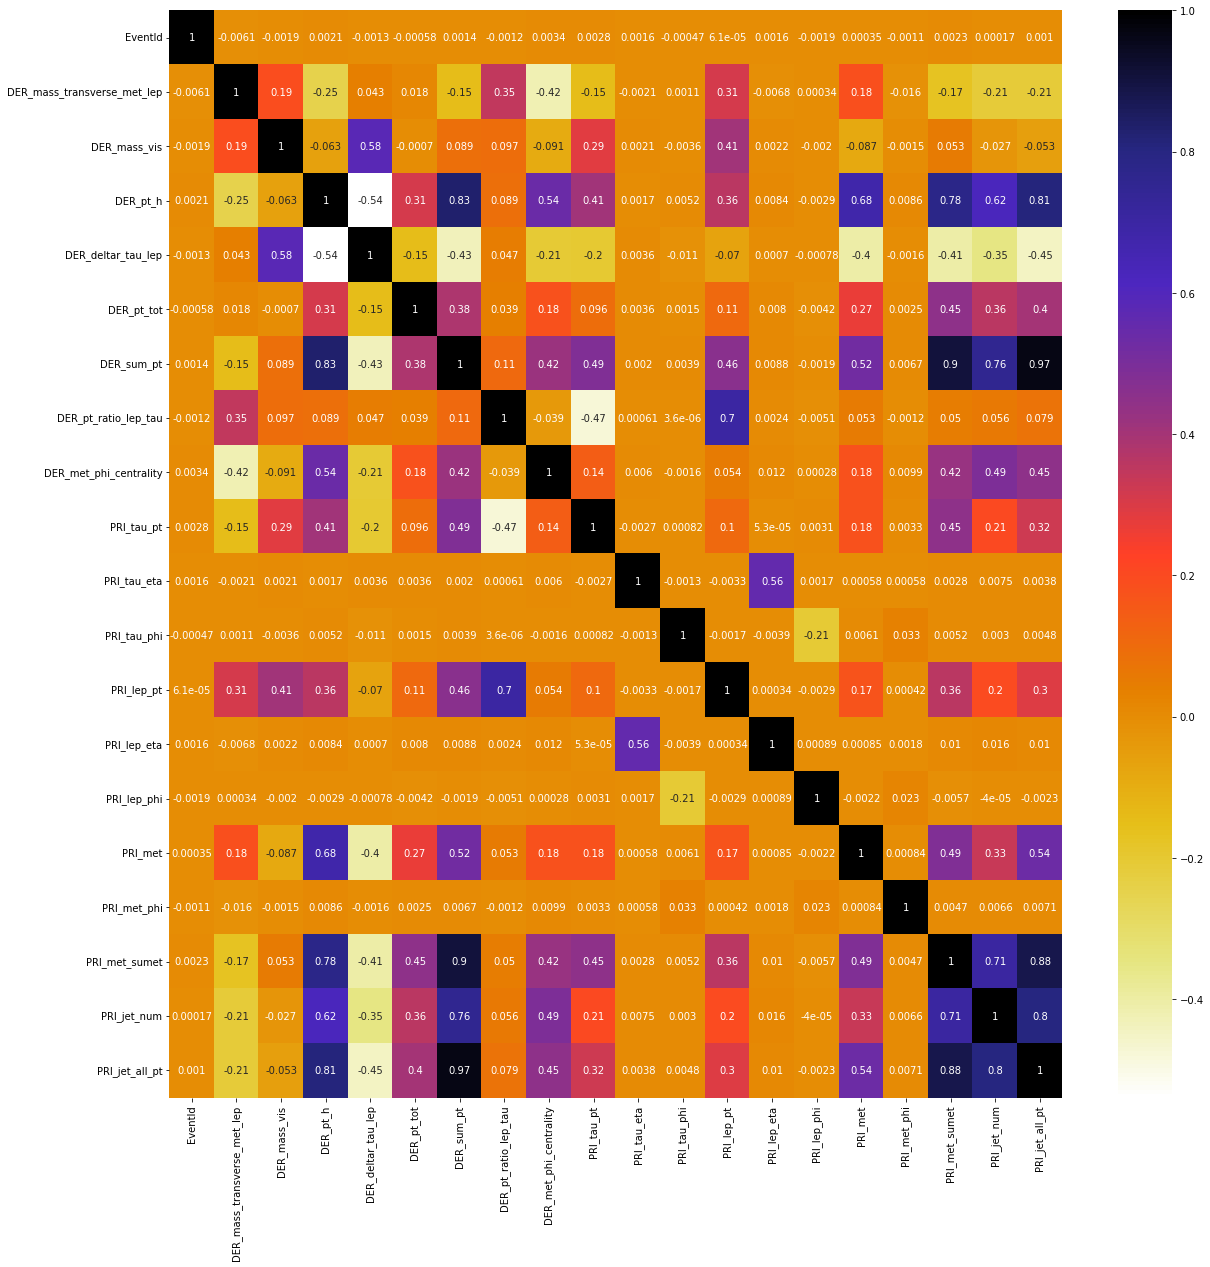

In [ ]:
plt.figure(figsize=(20,20))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(train, 0.71)
len(set(corr_features))

4

In [ ]:
corr_features 

{'DER_sum_pt', 'PRI_jet_all_pt', 'PRI_jet_num', 'PRI_met_sumet'}

In [ ]:
remove_columns = ['DER_sum_pt', 'PRI_jet_all_pt', 'PRI_jet_num', 'PRI_met_sumet']

In [ ]:
train = train.drop(remove_columns,axis=1)
test = test.drop(remove_columns,axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltar_tau_lep           250000 non-null  float64
 5   DER_pt_tot                   250000 non-null  float64
 6   DER_pt_ratio_lep_tau         250000 non-null  float64
 7   DER_met_phi_centrality       250000 non-null  float64
 8   PRI_tau_pt                   250000 non-null  float64
 9   PRI_tau_eta                  250000 non-null  float64
 10  PRI_tau_phi                  250000 non-null  float64
 11  PRI_lep_pt                   250000 non-null  float64
 12  PRI_lep_eta                  250000 non-null  float64
 13 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      550000 non-null  int64  
 1   DER_mass_transverse_met_lep  550000 non-null  float64
 2   DER_mass_vis                 550000 non-null  float64
 3   DER_pt_h                     550000 non-null  float64
 4   DER_deltar_tau_lep           550000 non-null  float64
 5   DER_pt_tot                   550000 non-null  float64
 6   DER_pt_ratio_lep_tau         550000 non-null  float64
 7   DER_met_phi_centrality       550000 non-null  float64
 8   PRI_tau_pt                   550000 non-null  float64
 9   PRI_tau_eta                  550000 non-null  float64
 10  PRI_tau_phi                  550000 non-null  float64
 11  PRI_lep_pt                   550000 non-null  float64
 12  PRI_lep_eta                  550000 non-null  float64
 13 

More On Object Feature

In [ ]:
train.select_dtypes('object')

,Label
0,s
1,b
2,b
3,b
4,b
...,...
249995,b
249996,b
249997,s
249998,b


In [ ]:
train.Label.unique()

array(['s', 'b'], dtype=object)

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
train['Label']= label_encoder.fit_transform(train['Label'])

In [ ]:
train.Label.unique()

array([1, 0])

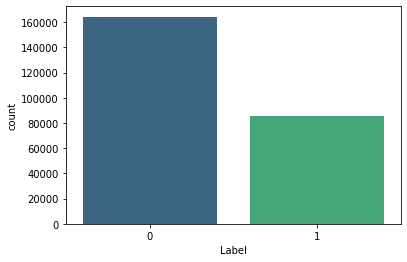

In [ ]:
sns.countplot(train['Label'], palette = "viridis")

S -------- >>> 1

b -------- >>> 0

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
EventId,250000.0,224999.500000,72168.927986,100000.000,162499.75000,224999.5000,287499.250,349999.000
DER_mass_transverse_met_lep,250000.0,49.239819,35.344886,0.000,19.24100,46.5240,73.598,690.075
DER_mass_vis,250000.0,81.181982,40.828691,6.329,59.38875,73.7520,92.259,1349.351
DER_pt_h,250000.0,57.895962,63.655682,0.000,14.06875,38.4675,79.169,2834.999
DER_deltar_tau_lep,250000.0,2.373100,0.782911,0.208,1.81000,2.4915,2.961,5.684
DER_pt_tot,250000.0,18.917332,22.273494,0.000,2.84100,12.3155,27.591,2834.999
DER_pt_ratio_lep_tau,250000.0,1.437609,0.844743,0.047,0.88300,1.2800,1.777,19.773
DER_met_phi_centrality,250000.0,-0.128305,1.193585,-1.414,-1.37100,-0.3560,1.225,1.414
PRI_tau_pt,250000.0,38.707419,22.412081,20.000,24.59175,31.8040,45.017,764.408
PRI_tau_eta,250000.0,-0.010973,1.214079,-2.499,-0.92500,-0.0230,0.898,2.497


It seems to have well optimized dataset, Mutual Information Gain feature selection should be used.

In [ ]:
train_checkpoint = train
test_checkpoint = test

In [ ]:
train_checkpoint.shape

(250000, 17)

In [ ]:
test_checkpoint.shape

(550000, 16)

#Step 3: Feature Selection using Mutual Information Gain

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltar_tau_lep           250000 non-null  float64
 5   DER_pt_tot                   250000 non-null  float64
 6   DER_pt_ratio_lep_tau         250000 non-null  float64
 7   DER_met_phi_centrality       250000 non-null  float64
 8   PRI_tau_pt                   250000 non-null  float64
 9   PRI_tau_eta                  250000 non-null  float64
 10  PRI_tau_phi                  250000 non-null  float64
 11  PRI_lep_pt                   250000 non-null  float64
 12  PRI_lep_eta                  250000 non-null  float64
 13 

In [ ]:
X_train = train.iloc[:,1:16]

In [ ]:
X_train.head()

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi
0,51.655,97.827,27.980,3.064,41.928,1.582,1.396,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277
1,68.768,103.235,48.146,3.473,2.078,0.879,1.414,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916
2,162.172,125.953,35.635,3.148,9.336,3.776,1.414,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186
3,81.417,80.943,0.414,3.310,0.414,2.354,-1.285,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060
4,16.915,134.805,16.405,3.891,16.405,1.056,-1.385,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871


In [ ]:
X_train.shape

(250000, 15)

In [ ]:
y_train = train.iloc[:,16]

In [ ]:
y_train.head()

0    1
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [ ]:
y_train.shape

(250000,)

Mutual Information


> MI Estimate mutual information for a discrete target variable.

> Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

> The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

> Inshort, A quantity called mutual information measures the amount of information one can obtain from one random variable given another.


In [ ]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.08741577, 0.07799319, 0.02083881, 0.01677253, 0.        ,
       0.04256237, 0.04650279, 0.0545372 , 0.00710462, 0.00094597,
       0.00279001, 0.0112315 , 0.00271882, 0.01552689, 0.00108175])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


DER_mass_transverse_met_lep    0.087416
DER_mass_vis                   0.077993
PRI_tau_pt                     0.054537
DER_met_phi_centrality         0.046503
DER_pt_ratio_lep_tau           0.042562
DER_pt_h                       0.020839
DER_deltar_tau_lep             0.016773
PRI_met                        0.015527
PRI_lep_eta                    0.011231
PRI_tau_eta                    0.007105
PRI_lep_pt                     0.002790
PRI_lep_phi                    0.002719
PRI_met_phi                    0.001082
PRI_tau_phi                    0.000946
DER_pt_tot                     0.000000
dtype: float64

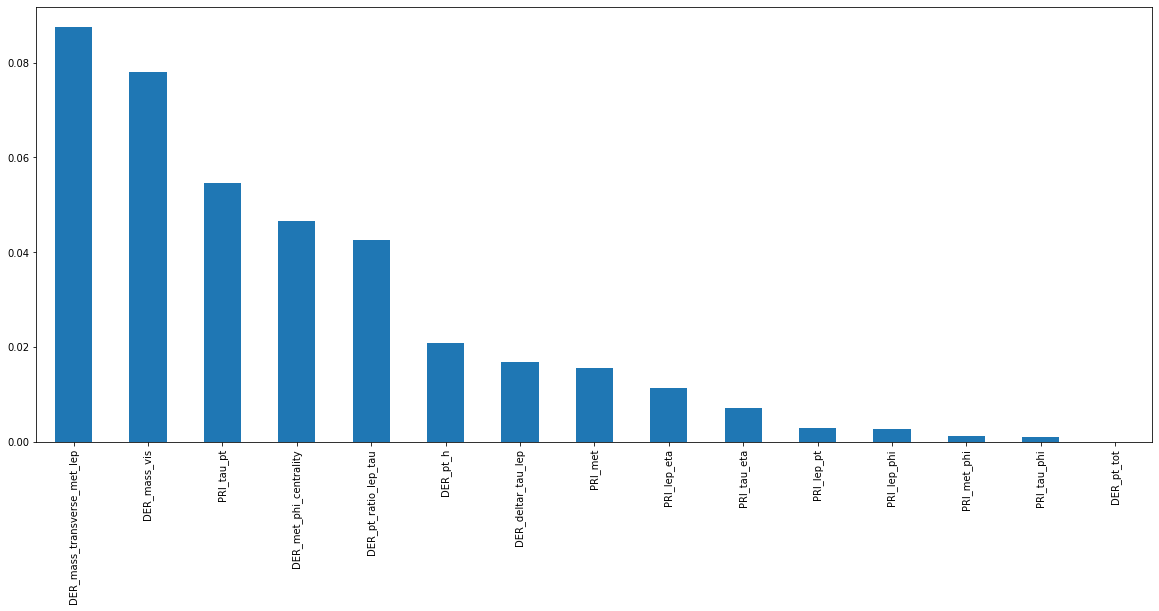

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
#No we Will select the  top 10  important features 
sel_five_cols = SelectKBest(mutual_info_classif)   #
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltar_tau_lep', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_lep_eta', 'PRI_met'],
      dtype='object')

In [ ]:
Choosen_Features = ['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltar_tau_lep', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_lep_eta', 'PRI_met']

Remove_features = ['PRI_lep_pt','PRI_tau_phi','DER_pt_tot','PRI_lep_phi','PRI_met_phi']

In [ ]:
train = train.drop(Remove_features,axis=1)

In [ ]:
test = test.drop(Remove_features,axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltar_tau_lep           250000 non-null  float64
 5   DER_pt_ratio_lep_tau         250000 non-null  float64
 6   DER_met_phi_centrality       250000 non-null  float64
 7   PRI_tau_pt                   250000 non-null  float64
 8   PRI_tau_eta                  250000 non-null  float64
 9   PRI_lep_eta                  250000 non-null  float64
 10  PRI_met                      250000 non-null  float64
 11  Label                        250000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 22.9 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550000 entries, 0 to 549999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      550000 non-null  int64  
 1   DER_mass_transverse_met_lep  550000 non-null  float64
 2   DER_mass_vis                 550000 non-null  float64
 3   DER_pt_h                     550000 non-null  float64
 4   DER_deltar_tau_lep           550000 non-null  float64
 5   DER_pt_ratio_lep_tau         550000 non-null  float64
 6   DER_met_phi_centrality       550000 non-null  float64
 7   PRI_tau_pt                   550000 non-null  float64
 8   PRI_tau_eta                  550000 non-null  float64
 9   PRI_lep_eta                  550000 non-null  float64
 10  PRI_met                      550000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 46.2 MB


# Step 4: Split and Standardize the Data



In [ ]:
Train_checkpoint_2 = train
Test_checkpoint_2 = test

In [ ]:
X = train.iloc[:,1:11]
y = train.iloc[:,11]

In [ ]:
print(X.shape)
print(y.shape)

(250000, 10)
(250000,)


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=0)  

In [ ]:
scalar= StandardScaler()  
x_train= scalar.fit_transform(x_train)  
x_test= scalar.fit_transform(x_test)  

In [ ]:
print("x_train_shape",x_train.shape)
print("y_train_shape",y_train.shape)
print("x_test_shape",x_test.shape)
print("y_test_shape",y_test.shape)

x_train_shape (200000, 10)
y_train_shape (200000,)
x_test_shape (50000, 10)
y_test_shape (50000,)


In [ ]:
x_train

array([[-0.23698366, -0.30259522,  0.05972269, ...,  0.04955471,
         0.07193535, -0.51705887],
       [-0.48304797, -0.00395004, -0.1400841 , ...,  0.7521357 ,
         0.25291361,  0.01367475],
       [ 0.44545656, -0.50253026, -0.88934778, ...,  1.1664361 ,
        -0.09876903,  0.13424519],
       ...,
       [-0.68419331, -0.11408644, -0.59376597, ..., -0.32932836,
         0.2165599 , -1.16047402],
       [-1.33379289, -0.49962486,  0.64429031, ..., -1.81520891,
        -1.68489725,  0.29809888],
       [-0.19916461, -0.26650974, -0.87736219, ...,  1.6128592 ,
         0.33352401, -0.87611034]])

In [ ]:
y_train

148936    0
40192     1
157575    0
61323     0
206410    0
         ..
176963    0
117952    0
173685    0
43567     0
199340    0
Name: Label, Length: 200000, dtype: int64

In [ ]:
x_test

array([[ 0.7654201 ,  0.25433931,  0.1590952 , ..., -1.78401079,
        -1.29761549,  0.67391278],
       [ 0.87047851, -1.2414415 , -0.87741616, ..., -1.0163015 ,
        -1.74952986,  0.35146534],
       [ 0.33207541, -0.05393226, -0.37374771, ..., -1.56325318,
        -1.22084544, -0.32437302],
       ...,
       [-0.55576724, -0.44005946,  1.75168423, ...,  0.30247809,
         0.74035216,  1.42542885],
       [-0.55420977, -0.40001517,  0.31463941, ..., -0.22388054,
         0.02172124,  0.25726512],
       [ 0.30661786, -0.79162551, -0.87311225, ..., -1.13244636,
        -1.24063154, -0.13693761]])

In [ ]:
y_test

140089    1
93747     0
180647    0
64526     1
19100     0
         ..
68205     1
210022    0
69904     1
217515    1
43660     0
Name: Label, Length: 50000, dtype: int64

#Step 5: Model Building 

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  

Logistic Regression

In [ ]:
classifier= LogisticRegression(max_iter=1500)  
classifier.fit(x_train, y_train)  

LogisticRegression(max_iter=1500)

In [ ]:
y_pred= classifier.predict(x_test)  

In [ ]:
cm= confusion_matrix(y_test,y_pred) 
cr = classification_report(y_test,y_pred)

In [ ]:
cm

array([[28170,  4701],
       [ 8895,  8234]])

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81     32871
           1       0.64      0.48      0.55     17129

    accuracy                           0.73     50000
   macro avg       0.70      0.67      0.68     50000
weighted avg       0.72      0.73      0.72     50000



Not Good

Support Vector Machining

In [ ]:
#Note : Training would take max 5 hours without GPU

In [ ]:
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

In [ ]:
y_pred= classifier.predict(x_test)  

In [ ]:
cm= confusion_matrix(y_test,y_pred) 
cr = classification_report(y_test,y_pred)

In [ ]:
cm

In [ ]:
print(cr)

In [ ]:
#And even get the accuracy , I guess It wont be good than other models.

I guess SVC would not also be good

Random Forest Classifier

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
y_pred= classifier.predict(x_test) 

In [ ]:
cm= confusion_matrix(y_test,y_pred) 
cr = classification_report(y_test,y_pred)

In [ ]:
cm

array([[28170,  4701],
       [ 8895,  8234]])

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81     32871
           1       0.64      0.48      0.55     17129

    accuracy                           0.73     50000
   macro avg       0.70      0.67      0.68     50000
weighted avg       0.72      0.73      0.72     50000



In [ ]:
n_estimators = [500, 600, 700, 800, 900] # [300, 400, 500, 600, 700]
max_depth = [6] # [3, 4, 5, 6, 7, 8]

param_grid = {"n_estimators": n_estimators,
             "max_depth": max_depth}


clf = RandomForestClassifier() # defining the classifier

grid_model = GridSearchCV(estimator= clf, param_grid= param_grid, cv=3, verbose= 4, n_jobs= 1)



grid_model.fit(x_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END .....max_depth=6, n_estimators=500;, score=0.801 total time= 2.3min
[CV 2/3] END .....max_depth=6, n_estimators=500;, score=0.800 total time= 2.2min
[CV 3/3] END .....max_depth=6, n_estimators=500;, score=0.800 total time= 2.2min
[CV 1/3] END .....max_depth=6, n_estimators=600;, score=0.801 total time= 2.7min
[CV 2/3] END .....max_depth=6, n_estimators=600;, score=0.800 total time= 3.0min
[CV 3/3] END .....max_depth=6, n_estimators=600;, score=0.800 total time= 3.0min
[CV 1/3] END .....max_depth=6, n_estimators=700;, score=0.801 total time= 3.4min
[CV 2/3] END .....max_depth=6, n_estimators=700;, score=0.801 total time= 3.1min
[CV 3/3] END .....max_depth=6, n_estimators=700;, score=0.800 total time= 3.2min
[CV 1/3] END .....max_depth=6, n_estimators=800;, score=0.801 total time= 3.7min
[CV 2/3] END .....max_depth=6, n_estimators=800;, score=0.800 total time= 3.6min
[CV 3/3] END .....max_depth=6, n_estimators=800;,

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [6],
                         'n_estimators': [500, 600, 700, 800, 900]},
             verbose=4)

In [ ]:
classifier_rf = RandomForestClassifier(random_state=0, n_jobs=1, max_depth=6,
                                       n_estimators=500, oob_score=True)

classifier_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=500, n_jobs=1, oob_score=True,
                       random_state=0)

In [ ]:
y_pred= classifier_rf.predict(x_test) 

In [ ]:
cm= confusion_matrix(y_test,y_pred) 
cr = classification_report(y_test,y_pred)

In [ ]:
cm

array([[29353,  3518],
       [ 6449, 10680]])

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85     32871
           1       0.75      0.62      0.68     17129

    accuracy                           0.80     50000
   macro avg       0.79      0.76      0.77     50000
weighted avg       0.80      0.80      0.80     50000



In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model_random_forest.sav'
pickle.dump(classifier_rf, open(filename, 'wb'))

Best among all the models

XG Boost

In [ ]:
model = XGBClassifier()  
model.fit(x_train , y_train)  

XGBClassifier()

In [ ]:
y_prediction = model.predict(x_test)  

In [ ]:
cm= confusion_matrix(y_test,y_pred) 
cr = classification_report(y_test,y_pred)

In [ ]:
cm

array([[24912,  7959],
       [ 6127, 11002]])

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78     32871
           1       0.58      0.64      0.61     17129

    accuracy                           0.72     50000
   macro avg       0.69      0.70      0.69     50000
weighted avg       0.73      0.72      0.72     50000



Hyper_parameter tuning for XG Boost

https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook 

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), (x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.69768
SCORE:
0.69776
SCORE:
0.68904
SCORE:
0.69812
SCORE:
0.69812
SCORE:
0.69948
SCORE:
0.6995
SCORE:
0.69812
SCORE:
0.69774
SCORE:
0.6995
SCORE:
0.70048
SCORE:
0.69946
SCORE:
0.69812
SCORE:
0.69874
SCORE:
0.70126
SCORE:
0.68902
SCORE:
0.6995
SCORE:
0.7012
SCORE:
0.68904
SCORE:
0.69812
SCORE:
0.69948
SCORE:
0.69956
SCORE:
0.7012
SCORE:
0.69998
SCORE:
0.70098
SCORE:
0.6978
SCORE:
0.69902
SCORE:
0.69912
SCORE:
0.69956
SCORE:
0.6978
SCORE:
0.69954
SCORE:
0.69998
SCORE:
0.69822
SCORE:
0.69966
SCORE:
0.7012
SCORE:
0.69768
SCORE:
0.7025
SCORE:
0.69968
SCORE:
0.69946
SCORE:
0.69954
SCORE:
0.69942
SCORE:
0.6978
SCORE:
0.69728
SCORE:
0.69956
SCORE:
0.69954
SCORE:
0.69948
SCORE:
0.69822
SCORE:
0.69912
SCORE:
0.70004
SCORE:
0.69728
SCORE:
0.69958
SCORE:
0.69902
SCORE:
0.6995
SCORE:
0.6995
SCORE:
0.69948
SCORE:
0.70102
SCORE:
0.69838
SCORE:
0.6995
SCORE:
0.69998
SCORE:
0.69998
SCORE:
0.6985
SCORE:
0.69912
SCORE:
0.69936
SCORE:
0.69968
SCORE:
0.69946
SCORE:
0.7012
SCORE:
0.70024
SCORE:
0.7

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.882080178343137, 'gamma': 5.521597701995269, 'max_depth': 4.0, 'min_child_weight': 2.0, 'reg_alpha': 49.0, 'reg_lambda': 0.30813537246321726}


In [ ]:
model = XGBClassifier(colsample_bytree =  0.882080178343137, gamma = 5.521597701995269, max_depth=4 , min_child_weight= 2.0, reg_alpha = 49.0, reg_lambda = 0.30813537246321726)  
model.fit(x_train , y_train)  

XGBClassifier(colsample_bytree=0.882080178343137, gamma=5.521597701995269,
              max_depth=4, min_child_weight=2.0, reg_alpha=49.0,
              reg_lambda=0.30813537246321726)

In [ ]:
y_prediction = model.predict(x_test) 

In [ ]:
cm= confusion_matrix(y_test,y_pred) 
cr = classification_report(y_test,y_pred)

In [ ]:
cm

array([[24912,  7959],
       [ 6127, 11002]])

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78     32871
           1       0.58      0.64      0.61     17129

    accuracy                           0.72     50000
   macro avg       0.69      0.70      0.69     50000
weighted avg       0.73      0.72      0.72     50000



ok..But not good

#Step 6: Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
train_checkpoint

,EventId,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,Label
0,100000,51.655,97.827,27.980,3.064,41.928,1.582,1.396,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,1
1,100001,68.768,103.235,48.146,3.473,2.078,0.879,1.414,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,0
2,100002,162.172,125.953,35.635,3.148,9.336,3.776,1.414,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,0
3,100003,81.417,80.943,0.414,3.310,0.414,2.354,-1.285,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,0
4,100004,16.915,134.805,16.405,3.891,16.405,1.056,-1.385,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,71.989,36.548,5.042,1.392,5.042,1.258,-1.414,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,0
249996,349996,58.179,68.083,22.439,2.585,22.439,1.162,-1.345,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,0
249997,349997,60.526,75.839,39.757,2.390,22.183,1.202,0.529,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,1
249998,349998,19.362,68.812,13.504,3.365,13.504,0.999,1.414,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,0


In [ ]:
data  = train_checkpoint.iloc[:,1:16]

In [ ]:
data

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi
0,51.655,97.827,27.980,3.064,41.928,1.582,1.396,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277
1,68.768,103.235,48.146,3.473,2.078,0.879,1.414,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916
2,162.172,125.953,35.635,3.148,9.336,3.776,1.414,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186
3,81.417,80.943,0.414,3.310,0.414,2.354,-1.285,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060
4,16.915,134.805,16.405,3.891,16.405,1.056,-1.385,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,71.989,36.548,5.042,1.392,5.042,1.258,-1.414,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859
249996,58.179,68.083,22.439,2.585,22.439,1.162,-1.345,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867
249997,60.526,75.839,39.757,2.390,22.183,1.202,0.529,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890
249998,19.362,68.812,13.504,3.365,13.504,0.999,1.414,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811


In [ ]:
data_y = train_checkpoint.iloc[:,16]

In [ ]:
x_pca_train, x_pca_test, y_pca_train, y_pca_test= train_test_split(data,data_y, test_size= 0.2, random_state=0)  

In [ ]:
pca.fit(x_pca_train)

PCA()

In [ ]:
x_pca_train=pca.transform(x_pca_train)

In [ ]:
x_pca_train.shape

(200000, 15)

In [ ]:
x_pca_train

array([[ 4.16636505e+00, -1.69747747e+01, -8.19996555e+00, ...,
        -1.21760336e-02, -9.72619545e-02, -1.40477568e-01],
       [-3.04756162e+00, -9.12145702e+00, -1.22054627e+01, ...,
         4.52300196e-01,  2.36930306e-01, -2.08823979e-01],
       [-5.58903232e+01, -1.87215659e+01,  2.55034196e+01, ...,
         1.11213035e+00, -4.41068176e-01,  3.38433441e-02],
       ...,
       [-4.58523094e+01, -1.81546223e+01, -2.80233716e+01, ...,
        -4.81071752e-01,  3.28474203e-01,  1.55415784e-02],
       [ 4.78258350e+01, -3.52950849e+01, -2.33275413e+01, ...,
        -1.51126571e-01, -2.94720672e-01,  2.57675992e-01],
       [-6.50586268e+01, -2.13790273e+01, -7.68823214e+00, ...,
         1.14639536e+00,  7.58677970e-01, -1.20680579e-01]])

In [ ]:
pca.explained_variance_ratio_

array([5.11627642e-01, 2.05321901e-01, 1.38528841e-01, 4.74176339e-02,
       4.58235137e-02, 3.65924201e-02, 1.32181949e-02, 4.14796161e-04,
       3.44642286e-04, 2.70158406e-04, 2.49337522e-04, 8.58317087e-05,
       7.08433340e-05, 2.15860917e-05, 1.26575054e-05])

In [ ]:
X_pca_final = x_pca_train

In [ ]:
X_pca_final.shape

(200000, 15)

In [ ]:
classifier_rf = RandomForestClassifier(random_state=0, n_jobs=1, max_depth=6,
                                       n_estimators=500, oob_score=True)

classifier_rf.fit(X_pca_final, y_pca_train)

RandomForestClassifier(max_depth=6, n_estimators=500, n_jobs=1, oob_score=True,
                       random_state=0)

In [ ]:
x_pca_test

array([[ 1.81384788e+01,  2.44313955e+01, -2.79074502e+01, ...,
         3.91877920e-01,  4.72965339e-01, -4.87783627e-01],
       [-5.33413092e+01, -3.54985707e+01, -5.34738543e+01, ...,
        -5.79092937e-01, -8.25043535e-01,  3.80532759e-01],
       [-2.66009484e+01,  3.45835845e+00, -9.68823265e+00, ...,
         3.81640959e-01,  3.69421950e-01, -1.55178747e-01],
       ...,
       [ 1.19602615e+02, -1.26259371e+01, -1.00915996e+01, ...,
         3.45694448e-01,  9.94352154e-02,  4.44914411e-01],
       [ 2.24991327e+01, -2.41152144e+01,  3.86800475e+00, ...,
         1.65174313e-01,  4.71369051e-02, -6.75316351e-02],
       [-5.57928043e+01, -2.90668933e+01, -2.25424687e+01, ...,
        -4.13397413e-02, -4.69824764e-01,  8.33823538e-02]])

In [ ]:
pca.fit(x_pca_test)

PCA()

In [ ]:
x_pca_test=pca.transform(x_pca_test)

In [ ]:
x_pca_test

array([[ 1.81384788e+01,  2.44313955e+01, -2.79074502e+01, ...,
         3.91877920e-01,  4.72965339e-01, -4.87783627e-01],
       [-5.33413092e+01, -3.54985707e+01, -5.34738543e+01, ...,
        -5.79092937e-01, -8.25043535e-01,  3.80532759e-01],
       [-2.66009484e+01,  3.45835845e+00, -9.68823265e+00, ...,
         3.81640959e-01,  3.69421950e-01, -1.55178747e-01],
       ...,
       [ 1.19602615e+02, -1.26259371e+01, -1.00915996e+01, ...,
         3.45694448e-01,  9.94352154e-02,  4.44914411e-01],
       [ 2.24991327e+01, -2.41152144e+01,  3.86800475e+00, ...,
         1.65174313e-01,  4.71369051e-02, -6.75316351e-02],
       [-5.57928043e+01, -2.90668933e+01, -2.25424687e+01, ...,
        -4.13397413e-02, -4.69824764e-01,  8.33823538e-02]])

In [ ]:
pca.explained_variance_ratio_

array([5.07996133e-01, 2.05897560e-01, 1.41016703e-01, 4.81593676e-02,
       4.44545160e-02, 3.78239775e-02, 1.31436220e-02, 4.26883189e-04,
       3.52825951e-04, 2.76272869e-04, 2.56168835e-04, 8.86124467e-05,
       7.21043958e-05, 2.20546298e-05, 1.31990888e-05])

In [ ]:
x_pca_test_final = x_pca_test

In [ ]:
y_pred= classifier_rf.predict(x_pca_test_final)

In [ ]:
cm= confusion_matrix(y_test,y_pred) 
cr = classification_report(y_test,y_pred)

In [ ]:
cm

array([[28976,  3895],
       [15497,  1632]])

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       0.65      0.88      0.75     32871
           1       0.30      0.10      0.14     17129

    accuracy                           0.61     50000
   macro avg       0.47      0.49      0.45     50000
weighted avg       0.53      0.61      0.54     50000



Not at all good

#Step 6: AMS score calculation and Prediction for Test Data

$$\text{AMS} = \sqrt{2\left((s+b+b_r) \log \left(1 + \frac{s}{b + b_r}\right)-s\right)}$$

* \\(s, b\\): unnormalized true positive and false positive rates, respectively,
* \\(b_r =10\\) is the constant regularization term,
* \\(\log\\) is the natural log.

More precisely, let \\((y_1, \ldots, y_n) \in \{\text{b},\text{s}\}^n\\) be the vector of true test labels, let \\((\hat{y}_1, \ldots, \hat{y}_n) \in \{\text{b},\text{s}\}^n\\) be the vector of predicted (submitted) test labels, and let \\((w_1, \ldots, w_n) \in {\mathbb{R}^+}^n\\) be the vector of weights. Then

<big>$$s = \sum_{i=1}^n w_i\mathbb{1}\{y_i = \text{s}\} \mathbb{1}\{\hat{y}_i = \text{s}\}$$</big>

and

<big>$$b = \sum_{i=1}^n w_i\mathbb{1}\{y_i = \text{b}\} \mathbb{1}\{\hat{y}_i = \text{s}\},$$</big>
 
    
where the indicator function \\(\mathbb{1}\{A\}\\) is 1 if its argument \\(A\\) is true and 0 otherwise.
    

we define a function to get AMS score based on predicted and actual labels from the validation set. This should give a rough idea on what to expect from the model after uploading on the Kaggle .

In [228]:
## This function will compute the AMS score
## We will predict the labels for whole undivided training dataset and pass them to this function
## The corresponding weights are also required

def get_AMS(pred, actual, weights):
    """
    pred = np array of labels from the model. Apply argmax before passing in function
    actual = pd series of actual labels from the validation set
    weights = pd series of weights from the validation set
    
    Returns the AMS score
    """
    AMS_frame = pd.DataFrame()
    AMS_frame["Predicted"]= pred
    AMS_frame["Actual"]= actual
    AMS_frame["Weight"]= weights
    
    display(AMS_frame)
    
    s= 0.0
    b= 0.0
    br= 10.0
    
    for index in range(len(AMS_frame)):
        if AMS_frame.iloc[index, 0] == 1: # predicted 1
            if AMS_frame.iloc[index, 1] == 1: # actual it is 1
                s += AMS_frame.iloc[index, 2]
                
            else: # actually it is 0
                b += AMS_frame.iloc[index, 2]
                
    
    score = 2.0* ((s +b +br)*np.log(1+ (s/(b+br)))- s)
    score = np.sqrt(score)
    print(f"AMS score : {score}")
    return score

In [239]:
train = pd.read_csv('/content/drive/MyDrive/ML for Physics Applications/Content/Beginner Program/Notebooks/Week 9/Higgs Boston/Datasets/training.csv')

In [244]:
X

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_lep_eta,PRI_met
0,51.655,97.827,27.980,3.064,1.582,1.396,32.638,1.017,2.273,16.824
1,68.768,103.235,48.146,3.473,0.879,1.414,42.014,2.039,0.501,44.704
2,162.172,125.953,35.635,3.148,3.776,1.414,32.154,-0.705,-0.953,54.283
3,81.417,80.943,0.414,3.310,2.354,-1.285,22.647,-1.655,-0.522,31.082
4,16.915,134.805,16.405,3.891,1.056,-1.385,28.209,-2.197,0.798,2.723
...,...,...,...,...,...,...,...,...,...,...
249995,71.989,36.548,5.042,1.392,1.258,-1.414,24.754,-0.414,-0.950,46.520
249996,58.179,68.083,22.439,2.585,1.162,-1.345,23.416,-1.609,0.308,46.737
249997,60.526,75.839,39.757,2.390,1.202,0.529,35.636,-0.266,0.381,23.419
249998,19.362,68.812,13.504,3.365,0.999,1.414,27.944,-2.211,-0.874,12.150


In [245]:
y

0         1
1         0
2         0
3         0
4         0
         ..
249995    0
249996    0
249997    1
249998    0
249999    0
Name: Label, Length: 250000, dtype: int64

In [246]:
scaler = StandardScaler()

In [247]:
scalar= StandardScaler()  
x_std= scalar.fit_transform(X)  
 

In [252]:
whole_label= y
whole_weight= train['Weight'].values

AMS score from best ML model(Random Forest)

In [253]:
loaded_model = pickle.load(open('/content/finalized_model_random_forest.sav', 'rb'))
prediction = loaded_model.predict(x_std)

In [254]:
get_AMS(prediction, whole_label, whole_weight)

,Predicted,Actual,Weight
0,0,1,0.002653
1,0,0,2.233584
2,0,0,2.347389
3,0,0,5.446378
4,0,0,6.245333
...,...,...,...
249995,0,0,4.505083
249996,0,0,2.497259
249997,0,1,0.018636
249998,0,0,1.681611


AMS score : 2.681736626371994


2.681736626371994

Prediction for Test data

In [256]:
Test_checkpoint_2

,EventId,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_lep_eta,PRI_met
0,350000,79.589,23.916,3.036,0.903,1.536,-1.404,22.088,-0.540,-0.504,48.509
1,350001,67.490,87.949,49.994,2.048,1.777,-1.204,30.716,-1.784,-0.169,21.093
2,350002,56.226,96.358,4.137,2.755,1.096,-1.408,46.564,-0.298,-0.548,19.461
3,350003,30.604,97.288,9.104,2.811,0.819,-1.382,51.741,0.388,-0.295,25.131
4,350004,82.772,58.731,89.646,1.028,1.713,-0.913,45.087,-1.548,-1.913,22.200
...,...,...,...,...,...,...,...,...,...,...,...
549995,899995,28.185,170.795,99.349,3.061,0.708,1.346,67.429,0.657,-1.372,61.754
549996,899996,5.096,77.256,33.040,2.693,0.948,0.551,31.964,0.162,-1.404,12.670
549997,899997,69.470,51.766,1.189,1.615,0.752,-1.398,41.290,0.559,0.578,49.505
549998,899998,13.500,79.833,50.801,2.026,1.087,-0.288,44.403,-0.504,-0.096,7.741


In [258]:
test_data = Test_checkpoint_2.iloc[:,1:]

In [260]:
scalar= StandardScaler()  
x_test= scalar.fit_transform(test_data)

In [261]:
prediction = loaded_model.predict(x_test)

In [263]:
prediction.shape

(550000,)

In [267]:
prediction = pd.DataFrame(data = prediction, 
              
                  columns = ['Prediction'])

In [268]:
prediction

,Prediction
0,0
1,0
2,0
3,1
4,0
...,...
549995,0
549996,1
549997,0
549998,1


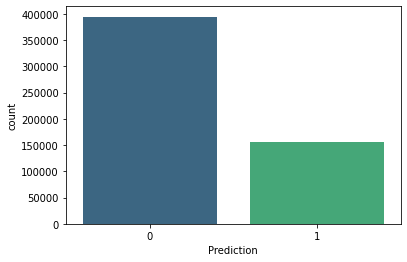

In [277]:
sns.countplot(prediction['Prediction'], palette = "viridis")

#Thank You Rohan Jiiiiiiiiiiiiiiiiiiiiiiiiii